# Check for Understanding — Autograded (PyTorch)
Run each cell. **Do not delete the asserts.**

**Passing condition:** all asserts pass.

Tip: If an assert fails, read its message, fix your code, and rerun the cell.


In [29]:
# Setup
import torch
import torch.nn as nn
import random
import matplotlib.pyplot as plt
import time

torch.manual_seed(42)

def _is_close(a, b, tol=1e-5):
    return torch.allclose(a, b, atol=tol, rtol=0)

print("PyTorch version:", torch.__version__)


PyTorch version: 2.9.1+cpu


## Part 1 — Tensors & Representations

In [2]:
# Exercise 1: Tensor basics
# TODO:
# 1) Create a 2x3 tensor of random values called X
# 2) Print X, X.shape, X.dtype
# 3) Compute the mean of all elements and store it in x_mean (a 0-d tensor)

def get_rand_list(elements,min_number=1,max_number=10):
    list_rand_list = []
    for i in range(elements):
        list_rand_list.append(random.randint(min_number, max_number))
    return list_rand_list


tensor_random_values = [get_rand_list(3), get_rand_list(3)]

print(tensor_random_values)

X = torch.Tensor(tensor_random_values)

total_sum = 0
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        total_sum += X[i][j]
x_mean = total_sum/(tuple(X.shape)[0] * tuple(X.shape)[1])


print(f"x_mean is a torch tensor: {torch.is_tensor(x_mean)}")
# Print statements (uncomment after implementing)
print("X=\n", X)
print("shape:", X.shape)
print("dtype:", X.dtype)
print("mean:", x_mean)

# --- autograder asserts (do not delete) ---
assert isinstance(X, torch.Tensor), "X must be a torch.Tensor"
assert X.shape == (2, 3), f"X must have shape (2,3), got {tuple(X.shape)}"
assert X.dtype in (torch.float32, torch.float64), f"X should be float32/float64, got {X.dtype}"
assert isinstance(x_mean, torch.Tensor) and x_mean.shape == (), "x_mean must be a scalar (0-d) tensor"
assert _is_close(x_mean, X.sum() / X.numel()), "x_mean should equal X.sum()/X.numel()"


[[8, 5, 9], [9, 9, 8]]
x_mean is a torch tensor: True
X=
 tensor([[8., 5., 9.],
        [9., 9., 8.]])
shape: torch.Size([2, 3])
dtype: torch.float32
mean: tensor(8.)


In [34]:
# Exercise 2: Manual vector operations
# TODO:
# 1) Create v1 and v2 as 1-D tensors of length 5
# 2) Compute element-wise sum: v_sum
# 3) Compute dot product: v_dot (scalar tensor)

v1_values = get_rand_list(5)
v2_values = get_rand_list(5)

v1 = torch.Tensor(v1_values)
v2 = torch.Tensor(v2_values)

v_sum = v1 + v2
v_dot = torch.dot(v1,v2)      # https://docs.pytorch.org/docs/stable/generated/torch.dot.html

#Print statements (uncomment after implementing)
print("v1:", v1)
print("v2:", v2)
print("v_sum:", v_sum)
print("v_dot:", v_dot)

# --- autograder asserts (do not delete) ---
assert v1.shape == (5,) and v2.shape == (5,), "v1 and v2 must both be shape (5,)"
assert v_sum.shape == (5,), "v_sum must be a length-5 vector"
assert v_dot.shape == (), "v_dot must be a scalar (0-d) tensor"
manual_dot = (v1 * v2).sum()
assert _is_close(v_dot, manual_dot), "v_dot must equal (v1*v2).sum()"


v1: tensor([5., 3., 7., 1., 4.])
v2: tensor([7., 4., 4., 2., 6.])
v_sum: tensor([12.,  7., 11.,  3., 10.])
v_dot: tensor(101.)


## Part 2 — Embeddings

In [3]:
# Exercise 3: Simple embedding lookup
# TODO:
# 1) Create an nn.Embedding called emb with vocab_size=10 and emb_dim=4
# 2) Create token_ids as a LongTensor of shape (3,) with values in [0, 9]
# 3) Lookup embeddings: E = emb(token_ids)
# 4) Print E and E.shape

vocab_size, emb_dim = 10, 4
emb = nn.Embedding(vocab_size, emb_dim)  # https://docs.pytorch.org/docs/stable/generated/torch.nn.Embedding.html


token_ids = torch.LongTensor(get_rand_list(3))
E = emb(token_ids)

print("token_ids_shape:", token_ids.shape)
# Print statements (uncomment after implementing)
print("token_ids:", token_ids)
print("E=\n", E)
print("E.shape:", E.shape)

# --- autograder asserts (do not delete) ---
assert isinstance(emb, nn.Embedding), "emb must be an nn.Embedding"
assert token_ids.dtype == torch.long, "token_ids must be torch.long"
assert token_ids.shape == (3,), f"token_ids must be shape (3,), got {tuple(token_ids.shape)}"
assert E.shape == (3, 4), f"E must have shape (3,4), got {tuple(E.shape)}"
assert E.requires_grad, "Embedding output should require gradients by default"


token_ids_shape: torch.Size([3])
token_ids: tensor([8, 5, 4])
E=
 tensor([[-1.4181,  0.8963,  0.0499,  2.2667],
        [-0.7581,  1.0783,  0.8008,  1.6806],
        [ 1.6423, -0.1596, -0.4974,  0.4396]], grad_fn=<EmbeddingBackward0>)
E.shape: torch.Size([3, 4])


In [4]:
# Exercise 4: From embeddings to a prediction
# NOTE: This exercise depends on Exercise 3 — complete that first.
# TODO:
# 1) Compute mean embedding across tokens: mean_E of shape (4,)
# 2) Create a Linear layer (4 -> 1) called head
# 3) Produce y_pred as shape (1,) or scalar



mean_E = E.mean(dim=0)
head = nn.Linear(4,1) # https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html
print("weight:",head.weight)
print("bias:",head.bias)

y_pred = head(mean_E)

# Print statements (uncomment after implementing)
print("mean_E.shape:", mean_E.shape)
print("y_pred:", y_pred, "shape:", y_pred.shape)

# --- autograder asserts (do not delete) ---
assert mean_E.shape == (4,), f"mean_E must be shape (4,), got {tuple(mean_E.shape)}"
assert isinstance(head, nn.Linear) and head.in_features == 4 and head.out_features == 1, "head must be Linear(4->1)"
assert y_pred.numel() == 1, "y_pred must have exactly 1 element"
assert y_pred.requires_grad, "y_pred should require gradients"


weight: Parameter containing:
tensor([[ 0.1581, -0.0087,  0.3913, -0.3553]], requires_grad=True)
bias: Parameter containing:
tensor([0.0315], requires_grad=True)
mean_E.shape: torch.Size([4])
y_pred: tensor([-0.4753], grad_fn=<ViewBackward0>) shape: torch.Size([1])


## Part 3 — Build a Tiny Network

In [5]:
# Exercise 5: Define a simple feed-forward network
# Requirements:
# - input_dim = 6
# - hidden_dim = 8
# - output_dim = 1
# - 1 hidden layer + ReLU
# Implement SimpleNet so forward(x) returns shape (batch, 1)


class SimpleNet(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=8, output_dim=1):
        super().__init__()
        # YOUR CODE HERE — define layers (fc1, fc2, activation)
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim,output_dim)

    def forward(self, x):
        first_layer_process = self.fc1(x)
        activation_filter_output = self.activation(first_layer_process)
        second_layer_process = self.fc2(activation_filter_output)
        return second_layer_process
        

model = SimpleNet()
print(model)

# --- autograder asserts (do not delete) ---
assert isinstance(model, nn.Module), "model must be an nn.Module"
params = dict(model.named_parameters())
assert "fc1.weight" in params and "fc2.weight" in params, "Model must have two Linear layers (fc1, fc2)"


SimpleNet(
  (fc1): Linear(in_features=6, out_features=8, bias=True)
  (activation): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [79]:
# Exercise 6: Forward pass with dummy data
# NOTE: This exercise depends on Exercise 5 — complete that first.
# TODO:
# 1) Create dummy input x of shape (4, 6)
# 2) Run out = model(x)
# 3) Print out and out.shape

x = torch.Tensor([get_rand_list(6), get_rand_list(6),get_rand_list(6),get_rand_list(6)])
print(x.shape)
out = model(x)

# Print statements (uncomment after implementing)
print("out=\n", out)
print("out.shape:", out.shape)

# --- autograder asserts (do not delete) ---
assert x.shape == (4, 6), f"x must be shape (4,6), got {tuple(x.shape)}"
assert out.shape == (4, 1), f"out must be shape (4,1), got {tuple(out.shape)}"


torch.Size([4, 6])
out=
 tensor([[-1.8705],
        [-3.3102],
        [-3.1325],
        [-2.5888]], grad_fn=<AddmmBackward0>)
out.shape: torch.Size([4, 1])


## Part 4 — One Training Step

In [9]:
# Exercise 7: One training step
# NOTE: This exercise depends on Exercise 5 — complete that first.
# TODO:
# 1) Create inputs x_train (batch=8, input_dim=6) and targets y_train (shape (8,1))
# 2) Define loss_fn = MSELoss and opt = SGD(model.parameters(), lr=0.1)
# 3) Perform exactly one update step and print loss_before and loss_after

torch.manual_seed(123)  # deterministic for this part


# Create training data (provided for you)
x_train = torch.randn(8, 6)
true_w = torch.tensor([[0.5], [-1.0], [0.3], [0.0], [1.2], [-0.7]])
y_train = x_train @ true_w + 0.01 * torch.randn(8, 1)
y_pred = model(x_train)

loss_fn = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.1)

# YOUR CODE HERE — compute loss_before (forward pass + loss)
loss_before = loss_fn(y_pred,y_train)

# YOUR CODE HERE — perform backward pass and optimizer step
opt.zero_grad()
loss_before.backward()
opt.step()
y_pred_new = model(x_train)

# YOUR CODE HERE — compute loss_after (forward pass + loss)
loss_after = loss_fn(y_pred_new,y_train)

# Print statements (uncomment after implementing)
print("loss_before:", float(loss_before))
print("loss_after :", float(loss_after))

# --- autograder asserts (do not delete) ---
assert loss_before.shape == (), "loss_before must be a scalar tensor"
assert loss_after.shape == (), "loss_after must be a scalar tensor"
assert float(loss_after) < float(loss_before), "loss_after should be < loss_before after one SGD step"


loss_before: 0.9827514886856079
loss_after : 0.832963764667511


## Optional Stretch (No grade)
If you finish early:
1. Add a second training step and show loss keeps decreasing.
2. Change activation to Tanh and compare loss curves.


In [30]:
### This is the same exercise 7, however in this I wanna recreate the model to reset the loss
### Optional Stretch 1. Add more trainings to show loss keeps decreasing :)

torch.manual_seed(123)  # deterministic for this part

model = SimpleNet() # I recreated the model to reset the loss.

# Create training data (provided for you)
x_train = torch.randn(8, 6)
true_w = torch.tensor([[0.5], [-1.0], [0.3], [0.0], [1.2], [-0.7]])
y_train = x_train @ true_w + 0.01 * torch.randn(8, 1)
y_pred = model(x_train)

loss_fn = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.1)

relu_loss = []
start_time = time.time() 
for i in range(50):
    loss = loss_fn(y_pred,y_train)
    
    # YOUR CODE HERE — perform backward pass and optimizer step
    opt.zero_grad()
    loss.backward()
    opt.step()
    y_pred = model(x_train)
    relu_loss.append(float(loss)) 
    print("loss:", float(loss))
end_time = time.time()   

relu_time = end_time - start_time
print("ReLU training time:", relu_time)


loss: 5.493083477020264
loss: 3.856753349304199
loss: 2.4201035499572754
loss: 0.9801077842712402
loss: 0.3528742790222168
loss: 0.1911127269268036
loss: 0.11984772980213165
loss: 0.07819503545761108
loss: 0.052076153457164764
loss: 0.03630135953426361
loss: 0.0259568989276886
loss: 0.019088972359895706
loss: 0.014463881962001324
loss: 0.01129381824284792
loss: 0.009073651395738125
loss: 0.007478942628949881
loss: 0.006300836801528931
loss: 0.005404388997703791
loss: 0.004701939877122641
loss: 0.004141014069318771
loss: 0.003680803580209613
loss: 0.003285399405285716
loss: 0.0029468778520822525
loss: 0.0026526865549385548
loss: 0.002395078307017684
loss: 0.00217041396535933
loss: 0.001965724164620042
loss: 0.0017828023992478848
loss: 0.0016202159458771348
loss: 0.001473003881983459
loss: 0.0013391685206443071
loss: 0.0012194325681775808
loss: 0.0011102234711870551
loss: 0.0010112437885254622
loss: 0.0009218782070092857
loss: 0.0008400682709179819
loss: 0.0007661890704184771
loss: 0.000

In [19]:

class SimpleNetTanh(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=8, output_dim=1):
        super().__init__()
        # YOUR CODE HERE — define layers (fc1, fc2, activation)
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_dim,output_dim)

    def forward(self, x):
        first_layer_process = self.fc1(x)
        activation_filter_output = self.tanh(first_layer_process)
        second_layer_process = self.fc2(activation_filter_output)
        return second_layer_process
        

model_tanh = SimpleNetTanh()
print(model_tanh)

SimpleNetTanh(
  (fc1): Linear(in_features=6, out_features=8, bias=True)
  (tanh): Tanh()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [31]:
### This is the same exercise 7, however in this I wanna recreate the model to reset the loss
### 2. Change activation to Tanh and compare loss curves.

torch.manual_seed(123)  # deterministic for this part

model = SimpleNetTanh() # I recreated the model to reset the loss.

# Create training data (provided for you)
x_train = torch.randn(8, 6)
true_w = torch.tensor([[0.5], [-1.0], [0.3], [0.0], [1.2], [-0.7]])
y_train = x_train @ true_w + 0.01 * torch.randn(8, 1)
y_pred = model(x_train)

loss_fn = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.1)

tanh_loss = []

start_time = time.time()

for i in range(50):
    loss = loss_fn(y_pred,y_train)
    
    # YOUR CODE HERE — perform backward pass and optimizer step
    opt.zero_grad()
    loss.backward()
    opt.step()
    y_pred = model(x_train)
    tanh_loss.append(float(loss)) 
    print("loss:", float(loss))

end_time = time.time() 

tanh_time = end_time - start_time
print("Tanh training time:", tanh_time)



loss: 4.889202117919922
loss: 2.3121156692504883
loss: 0.8529640436172485
loss: 0.2933088541030884
loss: 0.14771775901317596
loss: 0.09707336127758026
loss: 0.06822184473276138
loss: 0.04888845235109329
loss: 0.03550960123538971
loss: 0.026141449809074402
loss: 0.019517213106155396
loss: 0.014786781743168831
loss: 0.011373956687748432
loss: 0.008885171264410019
loss: 0.007049430161714554
loss: 0.005679026246070862
loss: 0.004643136635422707
loss: 0.003850020235404372
loss: 0.003234876785427332
loss: 0.002751631662249565
loss: 0.002367191482335329
loss: 0.0020576168317347765
loss: 0.0018053961684927344
loss: 0.0015975716523826122
loss: 0.0014244959456846118
loss: 0.0012788799358531833
loss: 0.0011551661882549524
loss: 0.0010491113644093275
loss: 0.0009573972783982754
loss: 0.0008774392772465944
loss: 0.0008072031196206808
loss: 0.0007450744160450995
loss: 0.0006897539715282619
loss: 0.0006402150029316545
loss: 0.0005955969099886715
loss: 0.0005552206421270967
loss: 0.0005185124464333057

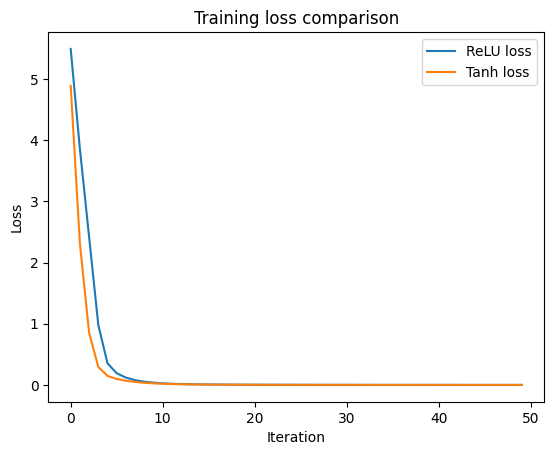

In [27]:
### Plot the curves activation_loss vs tanh_loss

import matplotlib.pyplot as plt

plt.plot(relu_loss, label="ReLU loss")
plt.plot(tanh_loss, label="Tanh loss")

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training loss comparison")
plt.legend()
plt.show()